
#  Predict Heart Disease in a patient

The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.   
This dataset was taken from Kaggle. Link: https://www.kaggle.com/ronitf/heart-disease-uci  
Features Information:

1- age

2- sex

3- cp : chest pain type (4 values)

4 - trestbps: resting blood pressure 

(High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the heart can cause: Chest pain, also called angina.)

5- chol: serum cholestoral in mg/dl   

( high levels of cholesterol can increase your risk of heart disease)

6- fbs: fasting blood sugar > 120 mg/dl

(Fasting glucose levels <70 mg/dL were associated with increased risk of all stroke (hazard ratio 1.06, 95% CI 1.01-1.11) in men and (hazard ratio 1.11, 1.05-1.17) in women. Conclusions: Both low glucose level and impaired fasting glucose should be considered as predictors of risk for stroke and coronary heart disease.)

7- restecg: resting electrocardiographic results (values 0,1,2)

(An abnormal reading does not necessarily mean that there is something wrong with the heart. On the other hand, some people may have a normal ECG recording even though they do have a heart disease. This is why you may need to have one or more other tests as well as the ECG.)

8- thalach: maximum heart rate achieved

(It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.)

9- exang: exercise induced angina

(Stable angina is usually triggered by physical activity. When you climb stairs, exercise or walk, your heart demands more blood, but narrowed arteries slow down blood flow.)

10- oldpeak: ST depression induced by exercise relative to rest

(ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline. It has also been associated with a worse prognosis for patients with a documented coronary artery disease (CAD).)
https://en.wikipedia.org/wiki/ST_depression#:~:text=ST%20depression%20refers%20to%20a,abnormally%20low%20below%20the%20baseline.

11- slope: the slope of the peak exercise ST segment

12- ca: number of major vessels (0-3) colored by flourosopy

13- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
(thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect))

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

In [51]:
X_all = pd.read_csv("heart.csv")

In [52]:
X_all.shape

(303, 14)

In [53]:
X_all.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
X_all.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [55]:
# check if target feature has missing value
X_all['target'].isnull().any()

False

In [56]:
# thal's values are inconsistent from the description
X_all['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [57]:
# Drop ['thal','cp','slope'] columns. 
# Too many features for the amount of data we have(around 300)
X_all.drop(['thal','cp','slope'], axis=1, inplace=True)

In [58]:
# separate target from predictors
y = X_all.target
X = X_all.drop(['target'], axis=1)

## Data Cleaning, Assigning correct Data Types for the columns

#### Differ categorical columns from numerical columns  
* categorical_features = [sex, cp, fbs, restecg, exang, slope, thal]  
* numeric_features = [age, trestbps, chol,thalach, oldpeak, ca]

In [59]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
dtype: object

In [60]:
# assign object dtype to the categorical variables 
X['sex'] = X['sex'].astype('object')
X['cp'] = X['cp'].astype('object')
X['fbs'] = X['fbs'].astype('object')
X['restecg'] = X['restecg'].astype('object')
X['exang'] = X['exang'].astype('object')
X['slope'] = X['slope'].astype('object')

In [62]:
# change the values of the categorical columns so that when we hot-encode interpretation will be easier
X['sex'][X['sex'] == 0] = 'female'
X['sex'][X['sex'] == 1] = 'male'

X['fbs'][X['fbs'] == 0] = 'lower than 120mg/ml'
X['fbs'][X['fbs'] == 1] = 'greater than 120mg/ml'

X['restecg'][X['restecg'] == 0] = 'normal'
X['restecg'][X['restecg'] == 1] = 'ST-T wave abnormality'
X['restecg'][X['restecg'] == 2] = 'left ventricular hypertrophy'

X['exang'][X['exang'] == 0] = 'no'
X['exang'][X['exang'] == 1] = 'yes'

#X['thal'][X['thal'] == 1] = 'normal'
#X['thal'][X['thal'] == 2] = 'fixed defect'
#X['thal'][X['thal'] == 3] = 'reversable defect'

<ipython-input-62-c76a804e6e60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][X['sex'] == 0] = 'female'
<ipython-input-62-c76a804e6e60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][X['sex'] == 1] = 'male'
<ipython-input-62-c76a804e6e60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fbs'][X['fbs'] == 0] = 'lower than 120mg/ml'
<ipython-input-62-c76a804e6e60>:6: SettingWithCopyWarning: 
A value is trying to

In [63]:
X.dtypes

age           int64
sex          object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
ca            int64
dtype: object

In [64]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality 
# If cardinality is high(>10) don't use OneHotEncoder, instead use Ordinal Encoding or Label Encoding
low_cardinality_cols = [name for name in X_train.columns if X_train[name].nunique() < 10 and X_train[name].dtype == 'object']
print(low_cardinality_cols)

['sex', 'fbs', 'restecg', 'exang']


## One Hot Encoding using pd.get_dummies approach  

pd.get_dummies()  
Convert categorical variable into dummy/indicator variables.

In [66]:
# checking if there is different column features in validation data with respect to training data
differ = set(X_valid.columns) - set(X_train.columns) 
differ

set()

In [67]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Saving the columns in a list
cols = X_train_encoded.columns.tolist()

In [68]:
X_train_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
237,60,140,293,170,1.2,2,1,1,0,1,0
106,69,160,234,131,0.1,1,1,0,0,1,0
10,54,140,239,160,1.2,0,1,1,0,0,0
153,66,146,278,152,0.0,1,0,1,0,1,0
77,59,140,221,164,0.0,0,1,1,0,0,1


In [69]:
#Now, we’ll encode the validation set followed by realigning the training and valid columns
#and filling in all missing values with zero.

In [71]:
X_valid_encoded = pd.get_dummies(X_valid, drop_first=True)

In [72]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,1,0
296,63,124,197,136,0.0,0,0,1,0,1
89,58,100,248,122,1.0,0,0,1,1,0
30,41,105,198,168,0.0,1,0,1,0,0
234,70,130,322,109,2.4,3,1,1,1,0


In [73]:
# Making sure that X_valid_encoded has the same columns as X_train_encoded
X_valid_encoded = X_valid_encoded.reindex(columns=cols).fillna(0)

In [75]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0


In [78]:
X_train_encoded['restecg_left ventricular hypertrophy'].value_counts()

0    238
1      4
Name: restecg_left ventricular hypertrophy, dtype: int64

In [79]:
X_train_encoded.shape

(242, 11)

In [80]:
X_valid_encoded.shape

(61, 11)

In [143]:
#with the join='left' statement we keep only the columns that X_train has!
#df_X_train, df_X_valid = df_X_train.align(df_X_valid, join='left', axis=1, fill_value=0)

# Next Steps
Check if label(target column) is balanced  
If there is imbalance cant use accuracy to evaluate model(.score() returns the mean accuracy on the given test data and labels.)  
Look at the confusion matrix and the do the f1 score

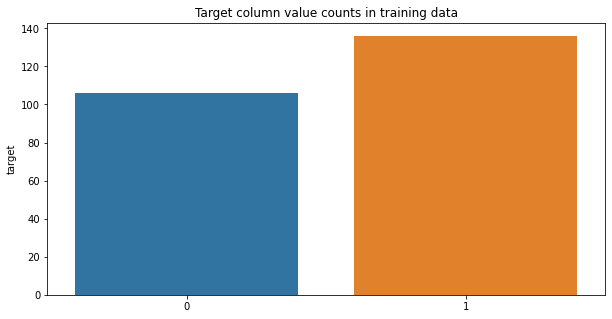

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot( x=y_train.value_counts().index, y=y_train.value_counts()).set(title='Target column value counts in training data')

## The Model

In [96]:
X_valid_encoded

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
173,58,132,224,173,3.2,2,1,1,0.0,1,0
94,45,112,160,138,0.0,0,0,1,0.0,0,0
161,55,132,342,166,1.2,0,0,1,0.0,0,0
216,62,130,263,97,1.2,1,0,1,0.0,0,0


In [97]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0


In [112]:
# Function for comparing different approaches
# CANT USE MAE FOR THIS,we use accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

def score_dataset(X_train, X_valid, y_train, y_valid):
    estimators = [5, 10, 20, 30, 50, 80, 100, 120]
    scores_list = []
    for i in estimators:
        model = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=2)
        model.fit(X_train_encoded, y_train)
        preds = model.predict(X_valid_encoded)
        scores_list.append(accuracy_score(y_valid, preds))
    return scores_list

In [113]:
print(score_dataset(X_train_encoded, X_valid_encoded, y_train, y_valid))

[0.8360655737704918, 0.8688524590163934, 0.819672131147541, 0.8032786885245902, 0.8524590163934426, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918]


In [115]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)
model.fit(X_train_encoded, y_train)
preds = model.predict(X_valid_encoded)
accuracy_score(y_valid, preds)

0.8688524590163934

### Image to help understand the classification Metrics
<img src="https://www.researchgate.net/profile/Junhua-Ding/publication/318432363/figure/fig3/AS:667604972761097@1536180837464/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram.ppm" width="400" height="400" />
Data Quality Considerations for Big Data and Machine Learning: Going Beyond Data Cleaning and Transformations - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram_fig3_318432363 [accessed 27 Jan, 2022]

In [119]:
print("Confusion Matrix: ")
confusion_matrix = confusion_matrix(y_valid, preds)
confusion_matrix

Confusion Matrix: 


array([[26,  6],
       [ 2, 27]])

In [120]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [122]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9285714285714286
Specificity :  0.8181818181818182


# Issues with the Data :

- I noticed that the chest pain (cp) values in the dataset don't match the values used when categorical values are replaced.
- The distinct chest pain (cp) values in the dataset are: 0, 1, 2 and 3. 
- ca - unique values are [0, 1, 2, 3, 4] (description says 0-3)
- thal - unique values are [0, 1, 2, 3] (description says [3, 6, 7])


#### from kaggle comments !  

The visualization is indeed very nice, but let me criticise you on stats and drawing conclusions. Researching so many features on a data set of 300 people will almost certainly lead to some fluke outcomes, so one must be very careful with conclusions.

For example, if you look closely at the age factor, there are very few young people, and they indeed have higher rates of disease. This clearly contradicts common sense and is most likely due to selection bias in the study. I would drop the age alltogether from any model.

There are few other candidates to drop. I mean, your decision tree is of depth 5, so you have 2^5 = 32 roots, and only 300 cases (around 240 for training). It is too easy to overfit. My guess is that getting your specificity rate will be possible by including only 3,4 variables in the model.



